In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/hrdataset/HRDataset_v14.csv


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv("../input/hrdataset/HRDataset_v14.csv")

In [8]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [9]:
df.shape

(311, 36)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [11]:
df.dtypes

Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

In [12]:
#cleaning data
df.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [13]:
df.fillna("0", inplace = True)

In [14]:
df.duplicated().sum()

0

**there are no duplicates**

In [15]:
df.head(5)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


**#EDA
#employees with highest salary >> top 10 higest employees**

In [16]:
df.Salary.sort_values(ascending = False).head(10)

150    250000
308    220450
131    180000
96     178000
55     170500
190    157000
240    150290
244    148999
243    140920
76     138888
Name: Salary, dtype: int64

**#Employees who needs the special attention
#Performance Improvement Plan(PIP)**

In [19]:
df['PerformanceScore'].unique()

array(['Exceeds', 'Fully Meets', 'Needs Improvement', 'PIP'], dtype=object)

In [23]:
df[df['PerformanceScore'] == "PIP"]

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
67,"Delarge, Alex",10306,0,0,1,1,6,1,0,61568,...,John Smith,17.0,Indeed,PIP,1.93,3,0,1/30/2019,6,5
69,"Desimone, Carl",10310,1,1,1,1,5,1,0,53189,...,Amy Dunn,11.0,Indeed,PIP,1.12,2,0,1/31/2019,4,9
72,"Dietrich, Jenna",10304,0,0,0,1,6,1,0,59231,...,John Smith,17.0,Website,PIP,2.30,1,0,1/29/2019,2,17
83,"Erilus, Angela",10299,0,3,0,1,5,1,0,56847,...,Michael Albert,22.0,Indeed,PIP,3.00,1,0,2/25/2019,2,5
90,"Fernandes, Nilson",10308,1,1,1,1,5,1,0,64057,...,Amy Dunn,11.0,Indeed,PIP,1.56,5,0,1/3/2019,6,15
91,"Fett, Boba",10309,0,0,1,1,3,1,0,53366,...,Peter Monroe,7.0,LinkedIn,PIP,1.20,3,6,2/4/2019,3,2
95,"Forrest, Alex",10305,1,1,1,1,6,3,0,70187,...,Lynn Daneault,21.0,Employee Referral,PIP,2.00,5,0,1/28/2019,4,7
112,"Gonzalez, Juan",10300,1,1,1,5,5,1,1,68898,...,Brannon Miller,12.0,Diversity Job Fair,PIP,3.00,3,0,3/6/2011,3,10
188,"Miller, Ned",10298,0,0,1,5,5,1,0,55800,...,Brannon Miller,12.0,LinkedIn,PIP,3.00,2,0,1/14/2013,6,6
205,"O'hare, Lynn",10303,0,0,0,4,5,1,0,52674,...,Kissy Sullivan,20.0,LinkedIn,PIP,2.33,2,0,3/9/2018,6,3


In [24]:
people_pip = df[df['PerformanceScore'] == 'PIP'].Employee_Name

In [25]:
len(people_pip)

13

In [26]:
people_pip

67           Delarge, Alex
69         Desimone, Carl 
72       Dietrich, Jenna  
83          Erilus, Angela
90     Fernandes, Nilson  
91              Fett, Boba
95           Forrest, Alex
112         Gonzalez, Juan
188            Miller, Ned
205           O'hare, Lynn
263       Sparks, Taylor  
267     Stansfield, Norman
307     Ybarra, Catherine 
Name: Employee_Name, dtype: object

**no. of absences**

In [27]:
df['Absences'].value_counts()

Absences
4     23
16    23
7     21
2     21
15    20
13    17
14    17
3     16
19    16
6     16
11    15
17    15
1     14
20    14
9     14
5     12
8     11
10    10
12     8
18     8
Name: count, dtype: int64

**employees are married or not**

In [28]:
df['MarriedID'].value_counts()

MarriedID
0    187
1    124
Name: count, dtype: int64

**#insights >> 187 employees are unmarries and 124 employees**

In [32]:
df[df['SpecialProjectsCount'] != 0]

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,...,Alex Sweetwater,10.0,LinkedIn,Fully Meets,3.04,3,4,1/2/2019,0,19
9,"Bacong, Alejandro",10250,0,2,1,1,3,3,0,50178,...,Peter Monroe,7.0,Indeed,Fully Meets,5.00,5,6,2/18/2019,0,16
12,"Barbossa, Hector",10012,0,2,1,1,3,4,1,92328,...,Simon Roup,4.0,Diversity Job Fair,Exceeds,4.28,4,5,2/25/2019,0,9
18,"Becker, Renee",10245,0,0,0,4,3,3,0,110000,...,Simon Roup,4.0,Google Search,Fully Meets,4.50,4,5,1/15/2015,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,"Voldemort, Lord",10118,1,1,1,4,3,3,0,113999,...,Simon Roup,4.0,Employee Referral,Fully Meets,4.33,3,7,2/15/2017,0,9
298,"Wang, Charlie",10172,0,0,1,1,3,3,0,84903,...,Brian Champaigne,13.0,Indeed,Fully Meets,3.42,4,7,1/4/2019,0,17
299,"Warfield, Sarah",10127,0,4,0,1,3,3,0,107226,...,Peter Monroe,7.0,Employee Referral,Fully Meets,4.20,4,8,2/5/2019,0,7
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16


In [34]:
df[df['SpecialProjectsCount'] == 0]

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,...,Amy Dunn,11.0,LinkedIn,Exceeds,5.00,5,0,1/7/2019,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,"Winthrop, Jordan",10033,0,0,1,5,5,4,0,70507,...,Brannon Miller,12.0,LinkedIn,Exceeds,5.00,3,0,1/19/2016,0,7
305,"Wolk, Hang T",10174,0,0,0,1,5,3,0,60446,...,David Stanley,14.0,LinkedIn,Fully Meets,3.40,4,0,2/21/2019,0,14
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4


In [35]:
#insights >> out of 311 employes 70 employees have special project

In [36]:
#Visualisation
#Highest salary vs lowest salary

In [37]:
df['Salary'].sort_values(ascending = False).head(10)

150    250000
308    220450
131    180000
96     178000
55     170500
190    157000
240    150290
244    148999
243    140920
76     138888
Name: Salary, dtype: int64

In [38]:
df['Salary'].sort_values(ascending = False).tail(10)

226    46430
247    46428
74     46335
159    46120
216    45998
152    45433
176    45395
231    45115
140    45069
310    45046
Name: Salary, dtype: int64

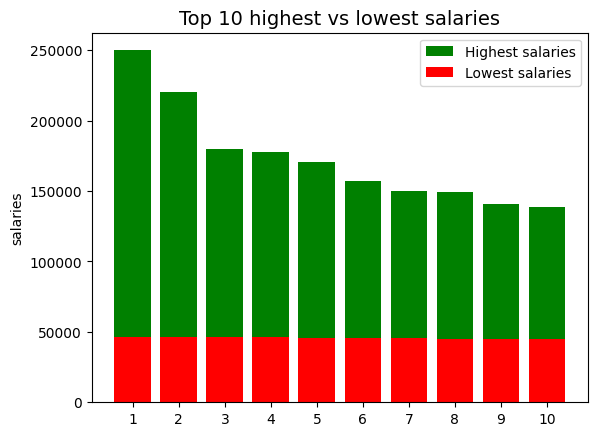

In [39]:
c = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

x = df['Salary'].sort_values(ascending = False).head(10)
y = df['Salary'].sort_values(ascending = False).tail(10)


plt.bar(c, x, color = 'g', label = 'Highest salaries')
plt.bar(c, y, color = 'r', label = 'Lowest salaries')



plt.title('Top 10 highest vs lowest salaries', fontsize = 14)

plt.xticks(c)
plt.ylabel('salaries')
plt.legend()
plt.show()

In [42]:
#insight
#lowest salary are mostly in range
#highest salary varies
y #lowest salary

226    46430
247    46428
74     46335
159    46120
216    45998
152    45433
176    45395
231    45115
140    45069
310    45046
Name: Salary, dtype: int64

In [43]:
x #highest salary

150    250000
308    220450
131    180000
96     178000
55     170500
190    157000
240    150290
244    148999
243    140920
76     138888
Name: Salary, dtype: int64

In [47]:
#sources of recruitment

df['RecruitmentSource'].unique()

array(['LinkedIn', 'Indeed', 'Google Search', 'Employee Referral',
       'Diversity Job Fair', 'On-line Web application', 'CareerBuilder',
       'Website', 'Other'], dtype=object)

In [50]:
l = df['RecruitmentSource'].value_counts()
l

RecruitmentSource
Indeed                     87
LinkedIn                   76
Google Search              49
Employee Referral          31
Diversity Job Fair         29
CareerBuilder              23
Website                    13
Other                       2
On-line Web application     1
Name: count, dtype: int64

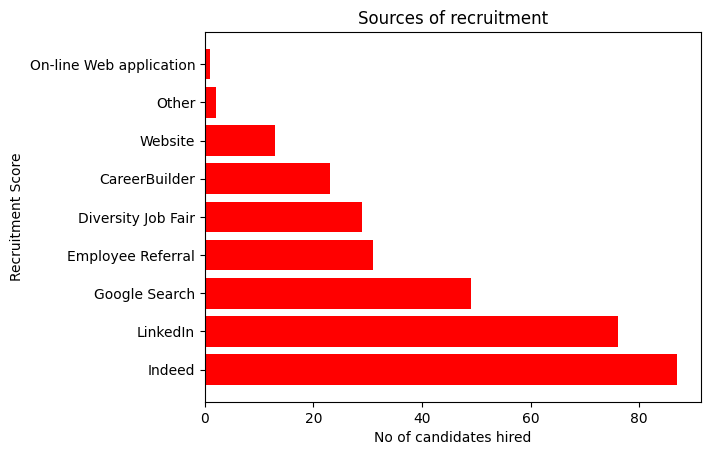

In [51]:
plt.barh(l.index,l,color = 'r')
plt.title('Sources of recruitment', fontsize = 12)

plt.xlabel('No of candidates hired')
plt.ylabel('Recruitment Score')


plt.show()

**#Insights
#Indeed is the most common
#Indded, linkedin, google search**

In [52]:
df['PerformanceScore']

0          Exceeds
1      Fully Meets
2      Fully Meets
3      Fully Meets
4      Fully Meets
          ...     
306    Fully Meets
307            PIP
308        Exceeds
309    Fully Meets
310    Fully Meets
Name: PerformanceScore, Length: 311, dtype: object

In [53]:
z = df['PerformanceScore'].value_counts()
z

PerformanceScore
Fully Meets          243
Exceeds               37
Needs Improvement     18
PIP                   13
Name: count, dtype: int64

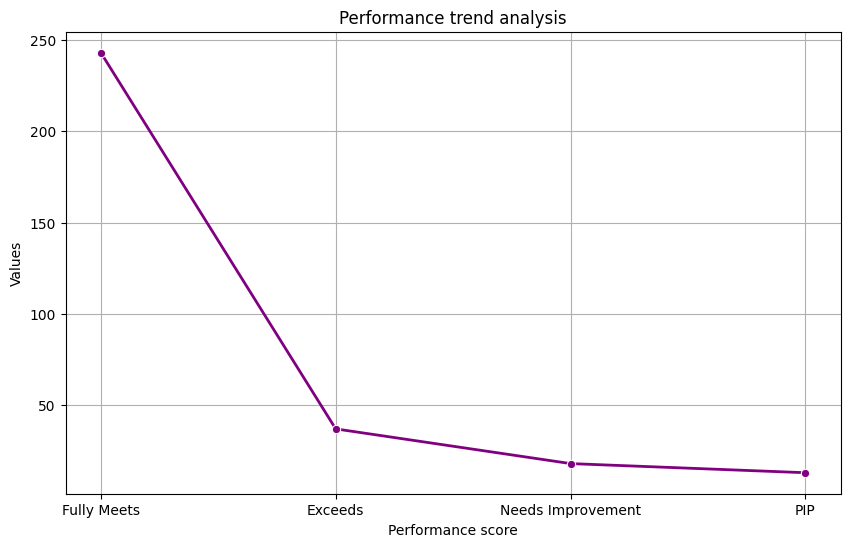

In [54]:
plt.figure(figsize = (10, 6))

sns.lineplot(data = z, marker = 'o', color = 'purple', linewidth = 2, )

plt.title('Performance trend analysis')
plt.xlabel('Performance score')
plt.ylabel("Values")
plt.grid()
plt.show()

**#insights
#general trend increases
#50-250 mostly the score**

In [55]:
df['EmpSatisfaction'] #scale of 1-5

0      5
1      3
2      3
3      5
4      4
      ..
306    4
307    2
308    5
309    3
310    5
Name: EmpSatisfaction, Length: 311, dtype: int64

In [56]:
b = df['EmpSatisfaction'].value_counts()
b

EmpSatisfaction
3    108
5     98
4     94
2      9
1      2
Name: count, dtype: int64

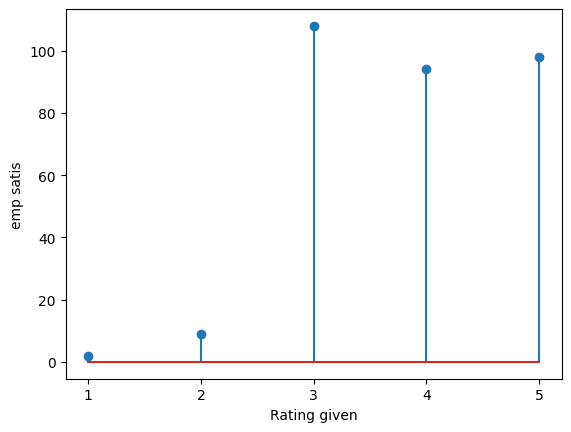

In [57]:
plt.stem(b.index, b)
plt.ylabel("No of employees")
plt.xticks(b.index)
plt.xlabel("Rating given")
plt.ylabel("emp satis")
plt.show()

**#insights
#the most common rating 3**

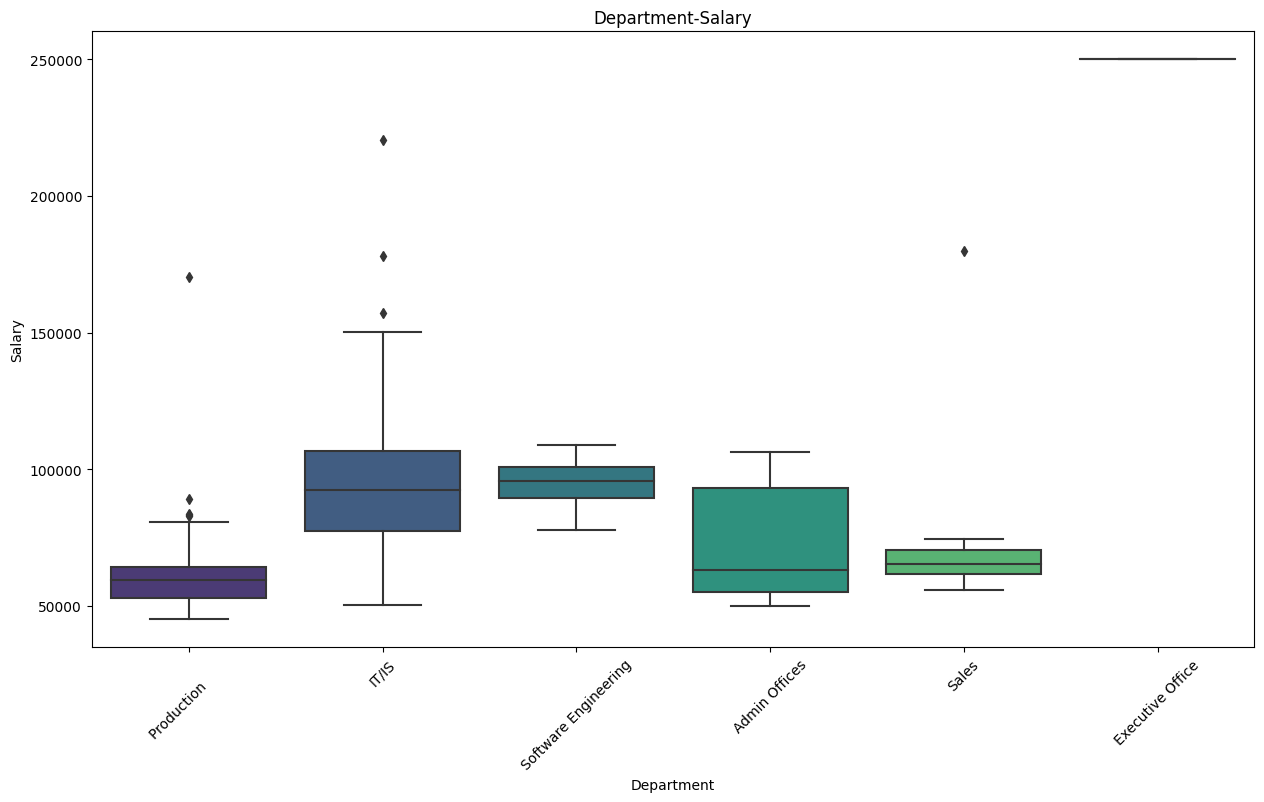

In [58]:
#outliers in salary in each department
plt.figure(figsize = (15, 8))

sns.boxplot(x = 'Department', y ='Salary', data = df, palette = 'viridis')
plt.title("Department-Salary")

plt.xlabel("Department")
plt.ylabel("Salary")
plt.xticks(rotation = 45)
plt.show()

**#insights
#executives are paid highest
#least salary is production**

In [59]:
df.Position

0       Production Technician I
1                       Sr. DBA
2      Production Technician II
3       Production Technician I
4       Production Technician I
                 ...           
306    Production Technician II
307     Production Technician I
308                         CIO
309                Data Analyst
310     Production Technician I
Name: Position, Length: 311, dtype: object

In [60]:
df.EngagementSurvey

0      4.60
1      4.96
2      3.02
3      4.84
4      5.00
       ... 
306    4.07
307    3.20
308    4.60
309    5.00
310    4.50
Name: EngagementSurvey, Length: 311, dtype: float64

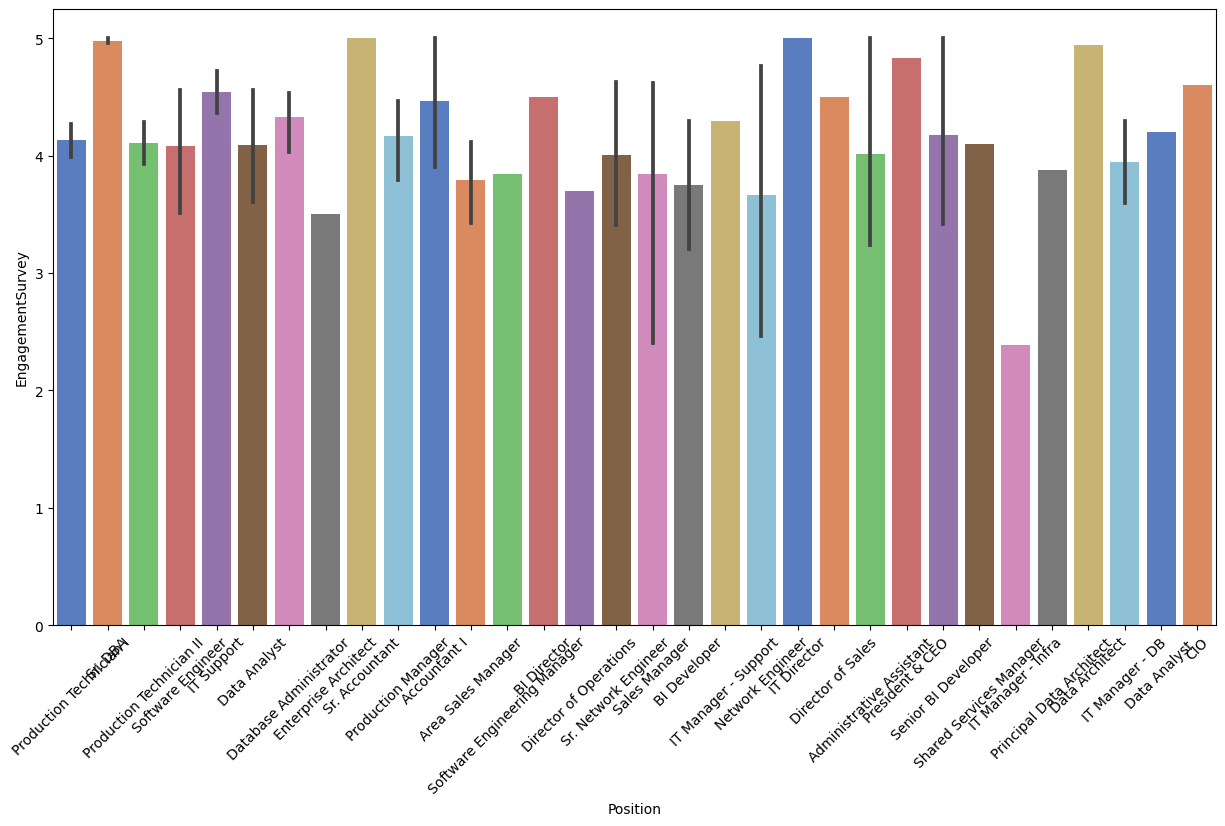

In [61]:
plt.figure(figsize = (15, 8))
sns.barplot(x = 'Position', y='EngagementSurvey', data = df, palette = 'muted')

plt.xticks(rotation = 45)
plt.show()

<Axes: xlabel='MaritalDesc', ylabel='count'>

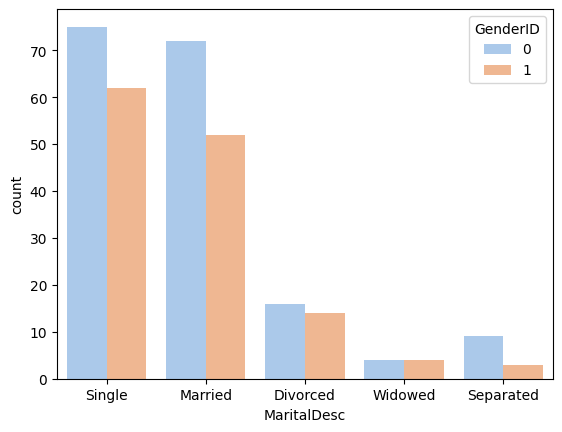

In [62]:
#marital status by gender
sns.countplot(x = 'MaritalDesc', hue = "GenderID", data = df, palette = "pastel")

In [65]:
#what is the avg enagement score for employees in each department

df.groupby('Department')['EngagementSurvey'].mean()

Department
Admin Offices           4.393333
Executive Office        4.830000
IT/IS                   4.154000
Production              4.129569
Sales                   3.818710
Software Engineering    4.061818
Name: EngagementSurvey, dtype: float64

In [67]:
#employees terminated from position
df[df['Termd'] == 1].groupby('Position')['Employee_Name'].count()

Position
Administrative Assistant     2
Area Sales Manager           4
Data Analyst                 1
Data Analyst                 1
Database Administrator       3
Enterprise Architect         1
IT Manager - DB              1
Network Engineer             1
Principal Data Architect     1
Production Manager           5
Production Technician I     52
Production Technician II    26
Sales Manager                1
Software Engineer            4
Sr. DBA                      1
Name: Employee_Name, dtype: int64

In [68]:
#how many employees have been terminated for each reason

df[df['Termd'] == 1].groupby('TermReason')['Employee_Name'].count()

TermReason
Another position                    20
Fatal attraction                     1
Learned that he is a gangster        1
attendance                           7
career change                        9
gross misconduct                     1
hours                                8
maternity leave - did not return     3
medical issues                       3
military                             4
more money                          11
no-call, no-show                     4
performance                          4
relocation out of area               5
retiring                             4
return to school                     5
unhappy                             14
Name: Employee_Name, dtype: int64

In [69]:
#What is the median salary of male and female employees
df.groupby('Sex')['Salary'].median()

Sex
F     62066.5
M     63353.0
Name: Salary, dtype: float64

In [70]:
#what is the maximum no of absences taken by employees in each department

df.groupby('Department')['Absences'].max()

Department
Admin Offices           20
Executive Office        10
IT/IS                   20
Production              20
Sales                   20
Software Engineering    19
Name: Absences, dtype: int64

In [71]:
#what is the total absences and average engaement survey score for each dept


df.groupby('Department').agg({'Absences': 'sum', 'EngagementSurvey':'mean'})

,Absences,EngagementSurvey
Department,,
Admin Offices,78,4.393333
Executive Office,10,4.830000
IT/IS,522,4.154000
Production,2120,4.129569
Sales,358,3.818710
Software Engineering,96,4.061818


In [72]:
#What is the total number of special projects and average absences for employees in each gender category?


df.groupby('Sex').agg({'SpecialProjectsCount': 'sum', 'Absences': 'mean'})

,SpecialProjectsCount,Absences
Sex,,
F,183,10.261364
M,196,10.207407
